In [1]:
##This notebook is built around using tensorflow as the backend for keras
!KERAS_BACKEND=tensorflow python -c "from keras import backend"

Using TensorFlow backend.


In [37]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

# dimensions of our images.
img_width, img_height = 299, 299

train_data_dir = '/home/username/data/Open_I_abd_vs_CXRs/TRAIN' #location of training data
validation_data_dir = '/home/username/data/Open_I_abd_vs_CXRs/VAL' #location of validation data

# number of samples used for determining the samples_per_epoch
nb_train_samples = 65
nb_validation_samples = 10
epochs = 20
batch_size = 5  

train_datagen = ImageDataGenerator(
        rescale=1./255,            # normalize pixel values to [0,1]
        shear_range=0.2,      
        zoom_range=0.2,    
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)  


val_datagen = ImageDataGenerator(
         rescale=1./255)       # normalize pixel values to [0,1]

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 65 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [38]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [39]:
model_top = Sequential()
model_top.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:], data_format=None)),  
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(1, activation='sigmoid')) 

model = Model(inputs=base_model.input, outputs=model_top(base_model.output))

model.compile(optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08,decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)


Epoch 1/20
13/13 [======================] - 10s - loss: 0.5701 - acc: 0.7231 - val_loss: 0.7761 - val_acc: 0.6000
Epoch 2/20
13/13 [======================] - 2s - loss: 0.1420 - acc: 0.9692 - val_loss: 0.4471 - val_acc: 0.8000
Epoch 3/20
13/13 [======================] - 2s - loss: 0.1645 - acc: 0.9385 - val_loss: 0.2711 - val_acc: 0.9000
Epoch 4/20
13/13 [======================] - 2s - loss: 0.0807 - acc: 0.9692 - val_loss: 0.2032 - val_acc: 0.9000
Epoch 5/20
13/13 [======================] - 2s - loss: 0.2372 - acc: 0.9538 - val_loss: 0.4368 - val_acc: 0.8000
Epoch 6/20
13/13 [======================] - 2s - loss: 0.0766 - acc: 0.9692 - val_loss: 0.0848 - val_acc: 1.0000
Epoch 7/20
13/13 [======================] - 2s - loss: 0.0609 - acc: 0.9846 - val_loss: 0.0693 - val_acc: 1.0000
Epoch 8/20
13/13 [======================] - 2s - loss: 0.1212 - acc: 0.9538 - val_loss: 0.1236 - val_acc: 0.9000
Epoch 9/20
13/13 [======================] - 2s - loss: 0.2516 - acc: 0.9385 - val_loss: 0.4150 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


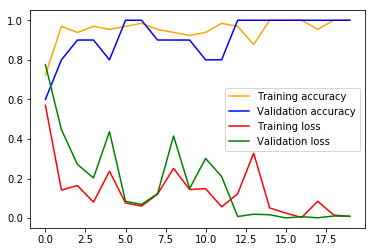

In [58]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.figure()
plt.plot(history.history['acc'], 'orange', label='Training accuracy')
plt.plot(history.history['val_acc'], 'blue', label='Validation accuracy')
plt.plot(history.history['loss'], 'red', label='Training loss')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend()
plt.show()


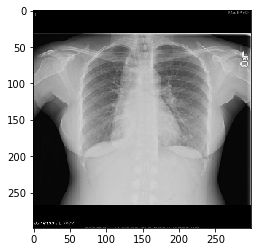

Predicted: [[  6.75419287e-05]] Chest X-ray


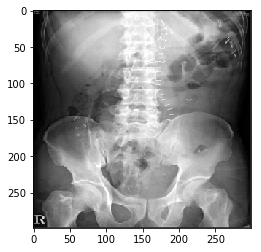

Predicted: [[ 0.99823171]] Abd X-ray


In [55]:
import numpy as np
from keras.preprocessing import image

img_path='/home/username/data/Open_I_abd_vs_CXRs/TRAIN/chest1.png' #change to location of chest x-ray
img_path2='/home/username/data/Open_I_abd_vs_CXRs/TRAIN/abd2.png'  #change to location of abd x-ray
img = image.load_img(img_path, target_size=(img_width, img_height))
img2 = image.load_img(img_path2, target_size=(img_width, img_height))
plt.imshow(img)
plt.show()

img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'Chest X-ray' if score < 0.5 else 'Abd X-ray')

plt.imshow(img2)
plt.show()

img = image.img_to_array(img2)
x = np.expand_dims(img2, axis=0) * 1./255
score2 = model.predict(x)
print('Predicted:', score2, 'Chest X-ray' if score2 < 0.5 else 'Abd X-ray')
